# **Project Name   - Amazon Prime TV Shows and Movies**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Mohd Osama


# **Project Summary -**

The project aimed to predict a continuous target variable for movies and TV shows using features like cast, director, genre, and other metadata.
Exploratory Data Analysis revealed an imbalanced dataset (~110,000 TV Shows vs ~10,000 Movies) and highlighted top contributors, e.g., Joseph Kane (director) and George “Gabby” Hayes (actor).
Multiple regression models were implemented: Linear Regression (baseline), Histogram-based Gradient Boosting Regressor, and XGBoost (final model), achieving MSE: 1.81, MAE: 0.99, R²: 0.59.
Evaluation metrics were visualized with bar charts, clearly showing XGBoost’s superior performance, and the model was saved for predicting unseen data.
The insights support content strategy, recommendation systems, and business growth by identifying top actors/directors and balancing content types.

# **GitHub Link -**

https://github.com/Osamac0d3/Amazon-Prime-TV-Shows-and-Movies

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd

### Dataset Loading

In [2]:
# Load Dataset
df_crd=pd.read_csv('credits_.csv')
df_ttl=pd.read_csv('titles_.csv')

### Dataset First View

In [3]:
# Credit Dataset First Look
df_crd.sample(2)

,person_id,id,name,character,role
84530,71130,tm212354,Maeve Quinlan,Diane,ACTOR
37542,143402,tm139738,Anjana Mumtaz,Shanti (Anand's Mother),ACTOR


In [4]:
# Tilte Dataset First Look
df_ttl.sample(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
8889,tm920846,Incident at Guilt Ridge,MOVIE,Dev and Jonas are two rogues on sort-of-opposi...,2020,NaN,76,['western'],['US'],NaN,tt9464000,3.4,86.0,1.4,2.0
1538,tm106772,May Morning,MOVIE,In a changing world a young Italian enrols at ...,1970,NaN,101,"['thriller', 'drama', 'european']",['IT'],NaN,tt0186808,5.7,111.0,0.6,6.5


### Dataset Rows & Columns count

In [5]:
# Credits Dataset Rows & Columns

df_crd.shape

(124235, 5)

In [6]:
# titles Dataset Rows & Columns
df_ttl.shape

(9871, 15)

**Cheking ID value same or not in both columns**

In [7]:
df_ttl['id'].nunique()

9868

In [8]:
 df_ttl['id'].isin(df_crd['id']).sum()


np.int64(8864)

In [9]:
df_ttl=df_ttl[df_ttl['id'].isin(df_crd['id'])]

In [10]:
df_ttl['id'].nunique()

8861

In [11]:
df_crd['id'].nunique()

8861

**Merging Both Data Frame**

In [12]:
df=pd.merge(df_crd,df_ttl, on='id', how='inner')


In [13]:
df[(df['release_year']==2022)]['title'].unique()

array(['Outer Range', 'From', 'The First Lady',
       'Star Trek: Strange New Worlds', 'The Man Who Fell to Earth',
       'All the Old Knives', 'Super Pumped', 'Ten Percent', 'Reacher',
       'Billy the Kid', '61st Street', 'That Dirty Black Bag',
       'Signora Volpe', 'Bang Bang Baby', 'I Want You Back',
       'The Legend of Vox Machina', 'Master', 'Verdict',
       'Hotel Transylvania: Transformania', 'Lucy and Desi',
       'As We See It', 'Power Book IV: Force', 'Guilty Minds',
       "Lizzo's Watch Out for the Big Grrrls", 'Bachchhan Paandey',
       'Yosi, the Regretful Spy', 'Book of Love', 'Modern Love: Mumbai',
       'I Love America', 'Radhe Shyam', 'LOL: Last One Laughing Canada',
       'The eighth clause', 'Harina', 'Saani Kaayidham', 'Jalsa',
       'Ombatthane Dikku', 'Veyil',
       'Phat Tuesdays: The Era of Hip Hop Comedy', 'Dogtown 2',
       'Love & Where to Find It', 'Naradan', 'Lov3', 'Porn and Ice Cream',
       'Pada', 'Break', 'Rooney', 'Pawankhind', 'Mot

In [14]:
df[0:3]

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


In [15]:
df.shape

(124347, 19)

### Dataset Information

In [16]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(168)

In [18]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(124179, 19)

#### Missing Values/Null Values

In [20]:
(df['release_year']=='1916')

,release_year
0,False
1,False
2,False
3,False
4,False
...,...
124342,False
124343,False
124344,False
124345,False


In [21]:
# Missing Values/Null Values Count
missing_df=(df.isna().sum()/len(df)*100).sort_values(ascending=False)
missing_df

,0
seasons,93.434478
age_certification,54.334469
character,13.107691
tmdb_score,8.188985
imdb_votes,4.892132
imdb_score,4.872805
imdb_id,4.270448
description,0.073281
tmdb_popularity,0.012079
person_id,0.000000


In [22]:
missing_df=pd.DataFrame(missing_df)


**Visualizing the missing values**

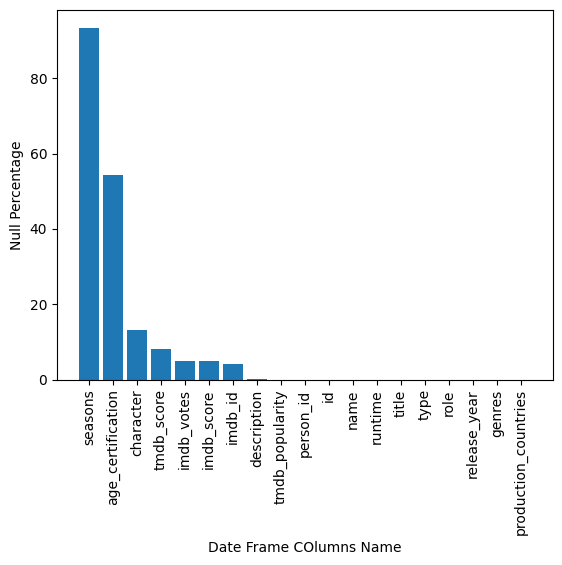

In [23]:
import matplotlib.pyplot as plt
plt.bar(missing_df.index,missing_df.values[:,0])
plt.xticks(rotation=90)
plt.ylabel('Null Percentage')
plt.xlabel('Date Frame COlumns Name')
plt.show()

### What did you know about your dataset?

From given dataset I observed that there is the shape of dataframe is (124179, 19). And Season column have high no of null value and nearly 11 columns contains 0 null value.

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [25]:
# Dataset Describe
df.describe()

,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.241790e+05,124179.000000,124179.000000,8153.000000,118128.000000,1.181040e+05,124164.000000,114010.000000
mean,4.065843e+05,1996.307186,95.577706,2.337790,5.968327,2.327575e+04,10.177932,5.991464
std,5.617204e+05,27.752141,30.166205,3.130184,1.242262,8.846004e+04,40.765311,1.321207
min,1.000000e+00,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,3.898850e+04,1983.000000,83.000000,1.000000,5.200000,2.890000e+02,1.886000,5.300000
50%,1.339490e+05,2009.000000,93.000000,1.000000,6.100000,1.257000e+03,3.896000,6.100000
75%,5.712810e+05,2017.000000,109.000000,2.000000,6.800000,7.074000e+03,8.795000,6.800000
max,2.371153e+06,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Check Unique Values for each variable.

In [26]:
# Check Unique Values for each variable.
df.nunique()

,0
person_id,80508
id,8861
name,79758
character,71097
role,2
title,8748
type,2
description,8833
release_year,110
age_certification,11


## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
df = df.drop(columns=['person_id','character','imdb_id'])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

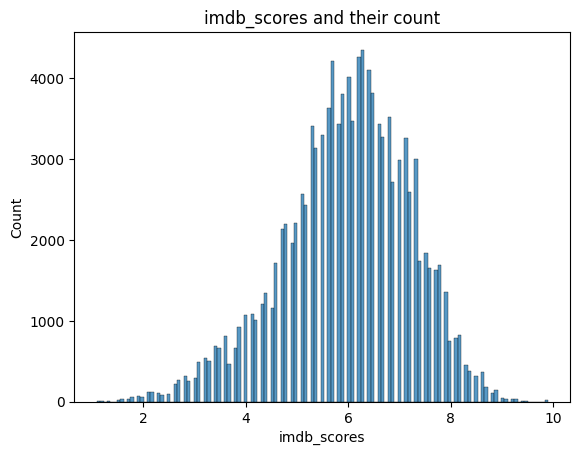

In [28]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel('imdb_scores')
plt.title('imdb_scores and their count')
sns.histplot(data=df,x=df['imdb_score'])
plt.show()



#### Chart - 2

**Count of movies and tv shows**

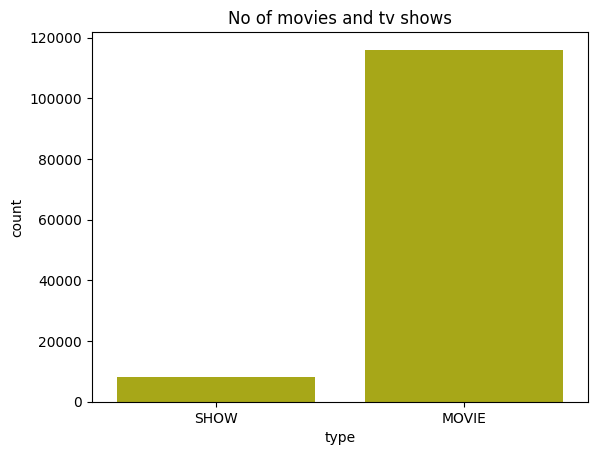

In [29]:
sns.countplot(data=df,x='type',color='y')
plt.title('No of movies and tv shows')
plt.xlabel('type')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for visualizing the frequency of categorical variables like type (Movies vs TV Shows).

##### 2. What is/are the insight(s) found from the chart?

The chart shows a huge imbalance: TV Shows are around 110,000, while Movies are only about 10,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight helps the business understand content distribution and user focus, enabling better content strategy, marketing, and investment decisions (e.g., strengthening TV content where demand is high).

#### Chart - 3

**Top 10 Directors**

In [30]:
top_directors=df[df['role']=='DIRECTOR']['name'].value_counts().head(10)
top_directors=top_directors.reset_index(name='count')
top_directors

,name,count
0,Joseph Kane,41
1,Sam Newfield,38
2,Jay Chapman,34
3,Lesley Selander,22
4,John English,21
5,Harry L. Fraser,21
6,William Nigh,20
7,Manny Rodriguez,17
8,Robert N. Bradbury,17
9,George Archainbaud,16


/tmp/ipython-input-71304224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors['count'],y=top_directors['name'], palette='plasma')


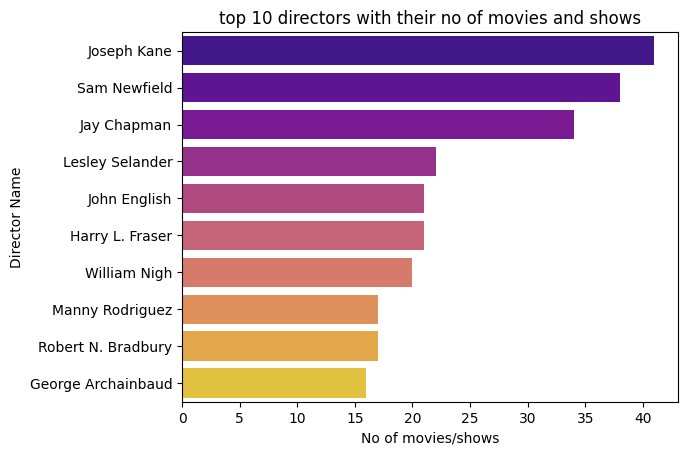

In [31]:
sns.barplot(x=top_directors['count'],y=top_directors['name'], palette='plasma')
plt.title('top 10 directors with their no of movies and shows')
plt.xlabel('No of movies/shows')
plt.ylabel('Director Name')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is best for comparing counts across multiple categories (directors)

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Joseph Kane (41) and Sam Newfield (38) are the most frequent directors, indicating they have contributed significantly more content than others in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

i) Yes. Identifying top directors helps the business focus on proven content creators, enabling better decisions in content acquisition, partnerships, and targeted promotions.

ii) Yes. Heavy reliance on a small group of directors may limit content diversity, which could reduce audience interest over time and negatively impact long-term user engagement.

#### Chart - 4

**Top 10 profile actors**

In [32]:
top_actors=df[df['role']=='ACTOR']['name'].value_counts().head(10)
top_actors=top_actors.reset_index(name='count')
top_actors

,name,count
0,George 'Gabby' Hayes,49
1,Roy Rogers,45
2,Bess Flowers,44
3,Gene Autry,40
4,Nassar,37
5,Herman Hack,35
6,Charles King,35
7,George Morrell,34
8,Earl Dwire,34
9,Forrest Taylor,34


/tmp/ipython-input-3495236995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors['count'],y=top_actors['name'],palette='plasma',color='r')


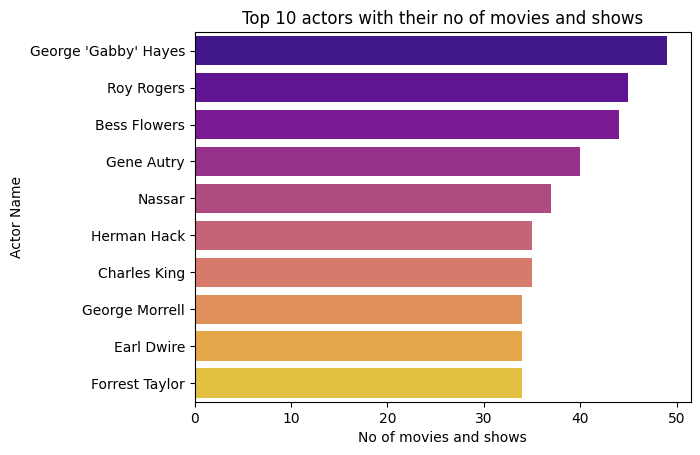

In [33]:
sns.barplot(x=top_actors['count'],y=top_actors['name'],palette='plasma',color='r')
plt.title('Top 10 actors with their no of movies and shows')
plt.xlabel('No of movies and shows')
plt.ylabel('Actor Name')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is suitable for comparing the number of movies and shows across multiple actors, making it easy to rank actors by frequency.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that George “Gabby” Hayes (49) and Roy Rogers (45) appear most frequently, indicating they are the most prominent actors in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help identify high-visibility actors, which can support decisions in content promotion, recommendation systems, and marketing strategies

#### Chart - 5

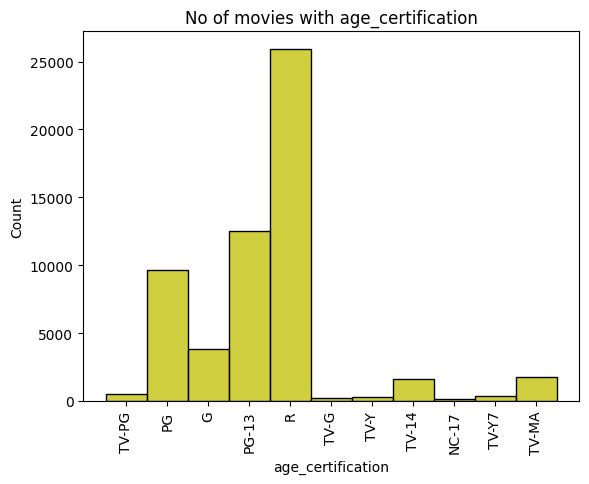

In [34]:
sns.histplot(data=df, x=df['age_certification'],color='y')
plt.xticks(rotation=90)
plt.xlabel('age_certification')
plt.title('No of movies with age_certification')
plt.show()

**Age_Certification with mean imdb score**

In [35]:
age_certification_mean =(df.groupby('age_certification')['imdb_score'].mean())
age_certification_mean= age_certification_mean.reset_index(name='imdb_score_mean').sort_values(by='imdb_score_mean',ascending=False)
age_certification_mean

,age_certification,imdb_score_mean
8,TV-PG,7.486437
7,TV-MA,7.414826
5,TV-14,7.346458
10,TV-Y7,6.786610
6,TV-G,6.619167
9,TV-Y,6.445734
3,PG-13,6.109463
2,PG,6.104737
0,G,6.043231
4,R,5.921518


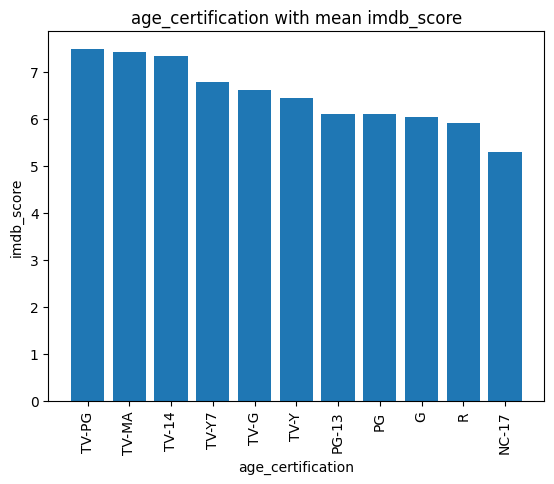

In [36]:
plt.bar(age_certification_mean['age_certification'],age_certification_mean['imdb_score_mean'])
plt.title('age_certification with mean imdb_score')
plt.xticks(rotation=90)
plt.xlabel('age_certification')
plt.ylabel('imdb_score')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the average IMDb scores across different age certification categories, making differences easy to observe.

##### 2. What is/are the insight(s) found from the chart?

Content rated TV-PG, TV-MA, and TV-14 has the highest average IMDb scores (around 7.3–7.5), while R and NC-17 rated content has comparatively lower average ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

i). Yes. This insight helps platforms prioritize age-appropriate, high-rated content, improving user satisfaction and guiding smarter content acquisition strategies.

ii). Yes. Lower IMDb scores for R and NC-17 content suggest limited audience appeal, which may lead to lower engagement and weaker returns if over-invested in these categories

#### Chart - 6

In [37]:
import ast

# example: your dataframe is df
df['production_countries'] = df['production_countries'].apply(
    lambda x: ast.literal_eval(x) if x != '[]' else []
)

In [38]:
df = df.explode('production_countries')
df = df.rename(columns={'production_countries': 'production_country'})
df = df.reset_index(drop=True)
df['production_country'].unique()

array(['US', 'GB', 'MX', 'CA', 'DE', 'SU', 'IN', 'XX', nan, 'IT', 'JP',
       'FR', 'HK', 'ES', 'IL', 'AU', 'CH', 'IE', 'GR', 'CN', 'PH', 'NL',
       'YU', 'CI', 'PR', 'LI', 'KR', 'XC', 'HU', 'TW', 'AN', 'MC', 'CO',
       'RO', 'EG', 'TR', 'BE', 'ZA', 'PT', 'CL', 'SE', 'BR', 'DK', 'NZ',
       'RU', 'LU', 'CZ', 'FI', 'AT', 'SK', 'AR', 'VE', 'TH', 'PL', 'AE',
       'SI', 'BA', 'ID', 'NO', 'AF', 'IR', 'IS', 'BG', 'JM', 'RS', 'SZ',
       'LT', 'TC', 'SG', 'UY', 'BO', 'UA', 'MY', 'TN', 'QA', 'NG', 'KZ',
       'GQ', 'MT', 'SO', 'KE', 'United States of America', 'MA', 'VN',
       'BD', 'FJ', 'MN', 'UG', 'TT', 'PK', 'XK', 'PE', 'DO', 'SV', 'GE',
       'PS', 'HR', 'LV', 'AQ', 'LB', 'KH', 'CR', 'BM', 'JO', 'PA', 'AL',
       'CY', 'CU', 'PY', 'EE', 'ET', 'PF', 'IO', 'AM', 'SY', 'CM', 'LY'],
      dtype=object)

In [39]:
df['production_country']=df['production_country'].replace({'United States of America':'US'})

**Production country and thier no of producing movies/shows**

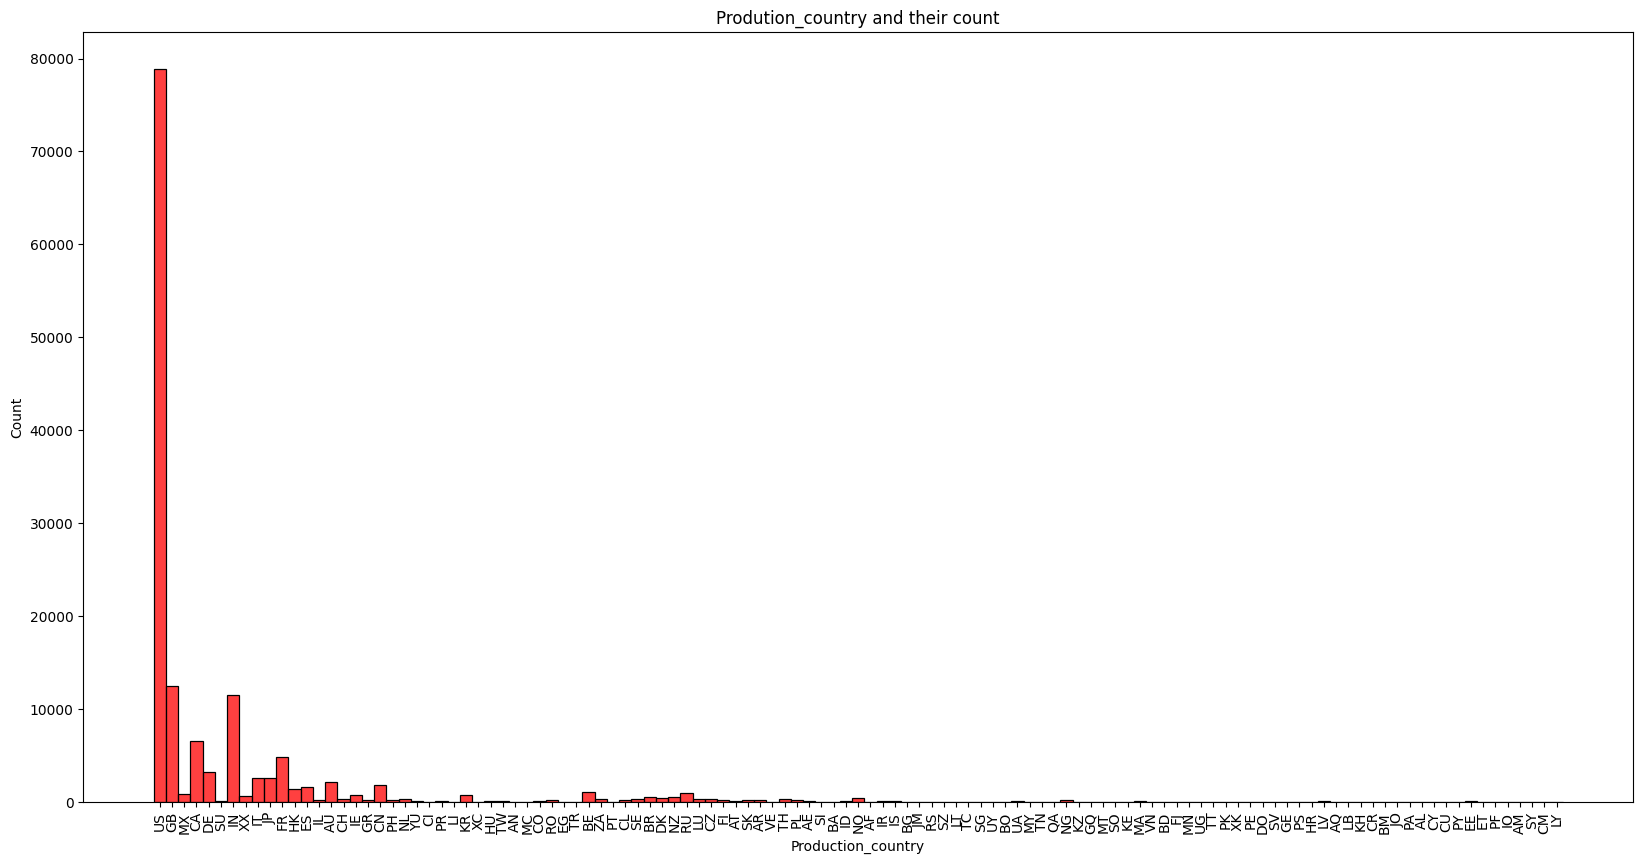

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(data=df,x=df['production_country'],color='r')
plt.title('Prodution_country and their count')
plt.xticks(rotation=90)
plt.xlabel('Production_country')
plt.show()

In [41]:
country_per=df['production_country'].value_counts(normalize=True)*100
country_per = country_per.reset_index(name='Percentage')

In [42]:
country_per

,production_country,Percentage
0,US,54.455213
1,GB,8.628783
2,IN,7.941241
3,CA,4.551165
4,FR,3.345207
...,...,...
110,FJ,0.002761
111,PY,0.002761
112,AQ,0.002071
113,LY,0.001381


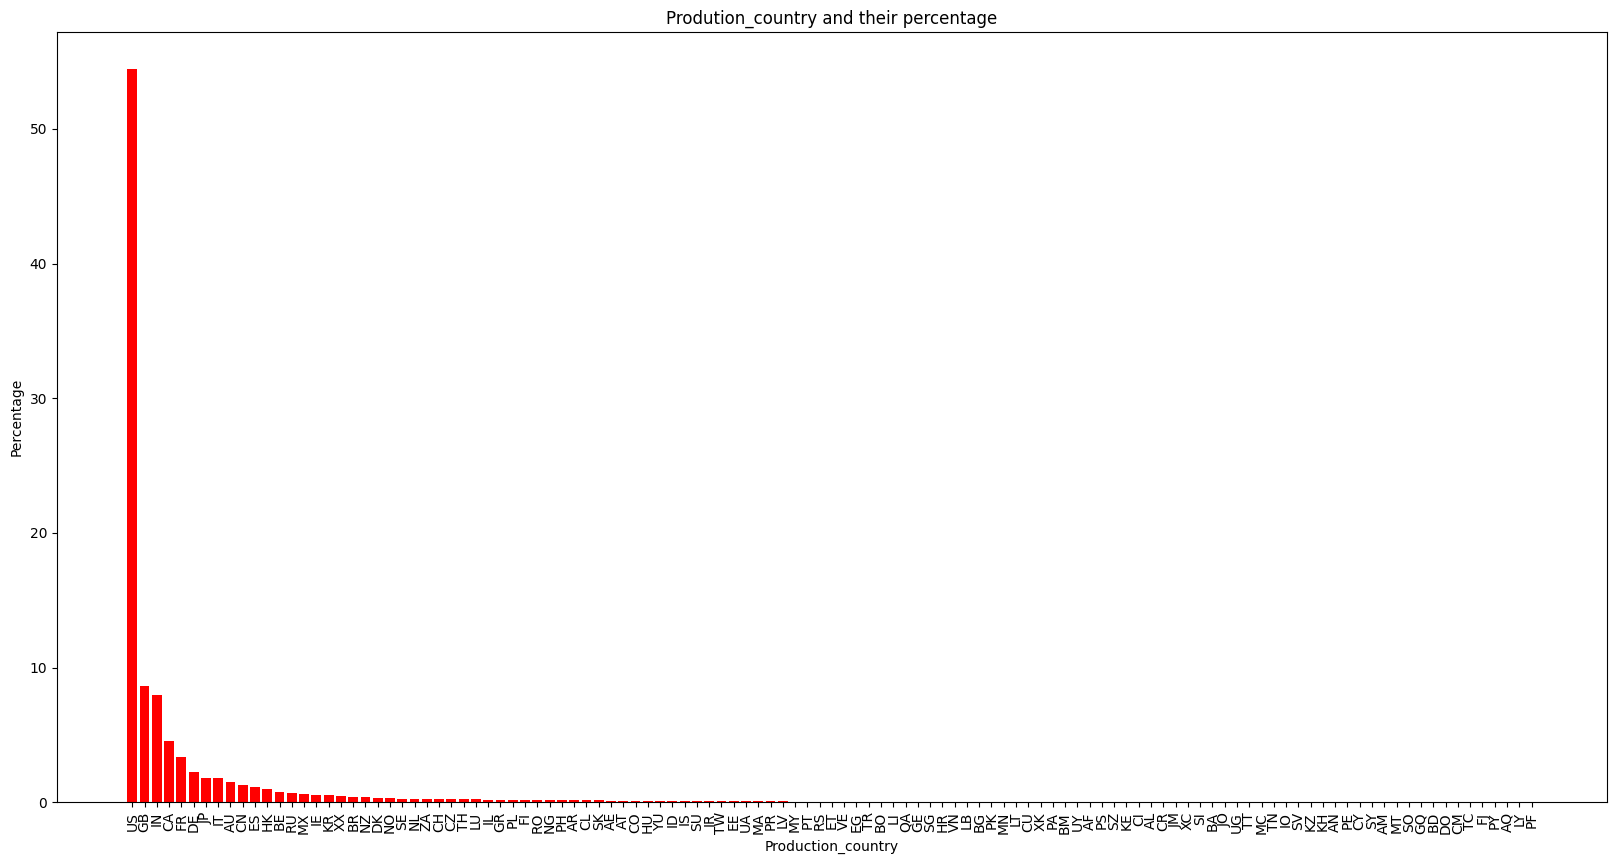

In [43]:
plt.figure(figsize=(20,10))
plt.bar(country_per['production_country'],country_per['Percentage'],color='r')
plt.title('Prodution_country and their percentage')
plt.xticks(rotation=90)
plt.xlabel('Production_country')
plt.ylabel('Percentage')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing the percentage contribution of each production country, clearly showing dominance and distribution across countries.

##### 2. What is/are the insight(s) found from the chart?

The US dominates production with ~54%, followed by GB (~8.6%) and India (~7.9%), while most other countries contribute a very small share.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on high-contributing countries can strengthen content performance and revenue, but over-dependence on a single country (US) may limit global appeal and slow growth in emerging markets.

#### Chart - 7

In [44]:
production_country_imdb_mean = (df.groupby('production_country')['imdb_score'].mean())
production_country_imdb_mean=production_country_imdb_mean.reset_index(name='mean_imdb_score').sort_values(by='mean_imdb_score',ascending=False)
production_country_imdb_mean

,production_country,mean_imdb_score
59,LB,7.875676
2,AL,7.839130
77,PF,7.800000
38,GE,7.690476
94,SU,7.621429
...,...,...
48,IO,4.200000
35,FJ,4.050000
29,DO,3.800000
98,TC,3.500000


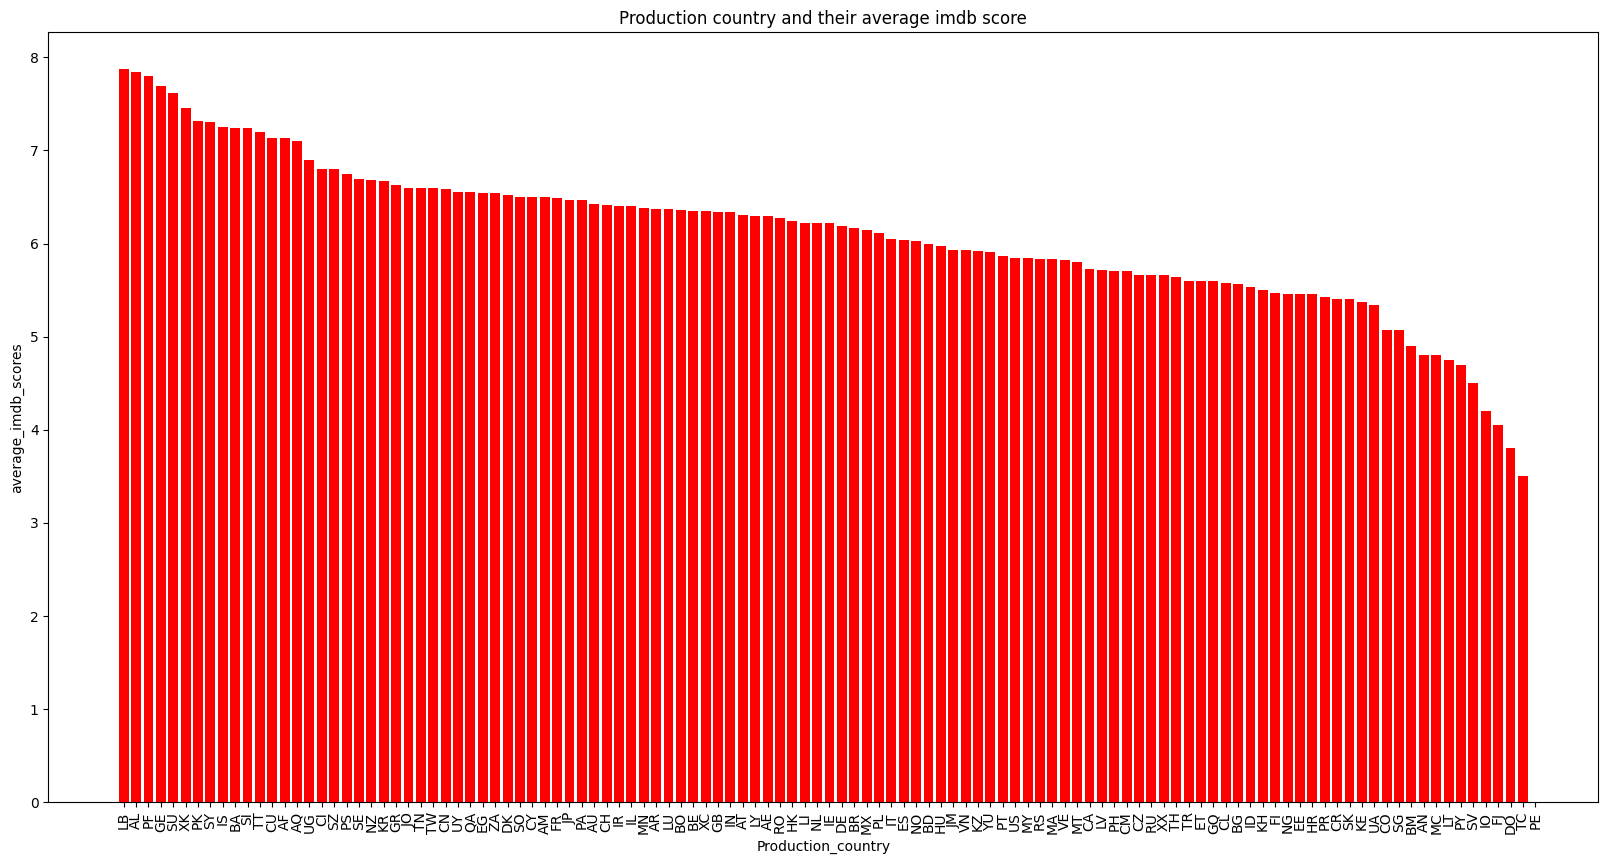

In [45]:
plt.figure(figsize=(20,10))
plt.bar(production_country_imdb_mean['production_country'],production_country_imdb_mean['mean_imdb_score'],color='r')
plt.title('Production country and their average imdb score')
plt.xticks(rotation =90)
plt.xlabel('Production_country')
plt.ylabel('average_imdb_scores')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is suitable for comparing the average IMDb scores across production countries, making quality differences easy to identify.

##### 2. What is/are the insight(s) found from the chart?

Countries like Lebanon (LB), Albania (AL), and French Polynesia (PF) have the highest average IMDb scores, while countries such as Dominican Republic (DO) and Turks and Caicos (TC) show much lower average ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help identify countries producing high-quality content for strategic investment, but consistently low-rated countries may contribute to weaker engagement and negative growth if content quality is not improved.

#### Chart - 8

In [46]:
year_imdb=(df.groupby('release_year')['imdb_score'].mean())
year_imdb=year_imdb.reset_index(name='mean_imdb_score')
year_imdb=year_imdb.sort_values(by='release_year',ascending=False)
year_imdb

,release_year,mean_imdb_score
109,2022,6.585566
108,2021,5.735728
107,2020,5.694864
106,2019,5.931198
105,2018,5.896245
...,...,...
4,1917,6.300000
3,1916,7.483333
2,1915,6.088679
1,1914,5.521212


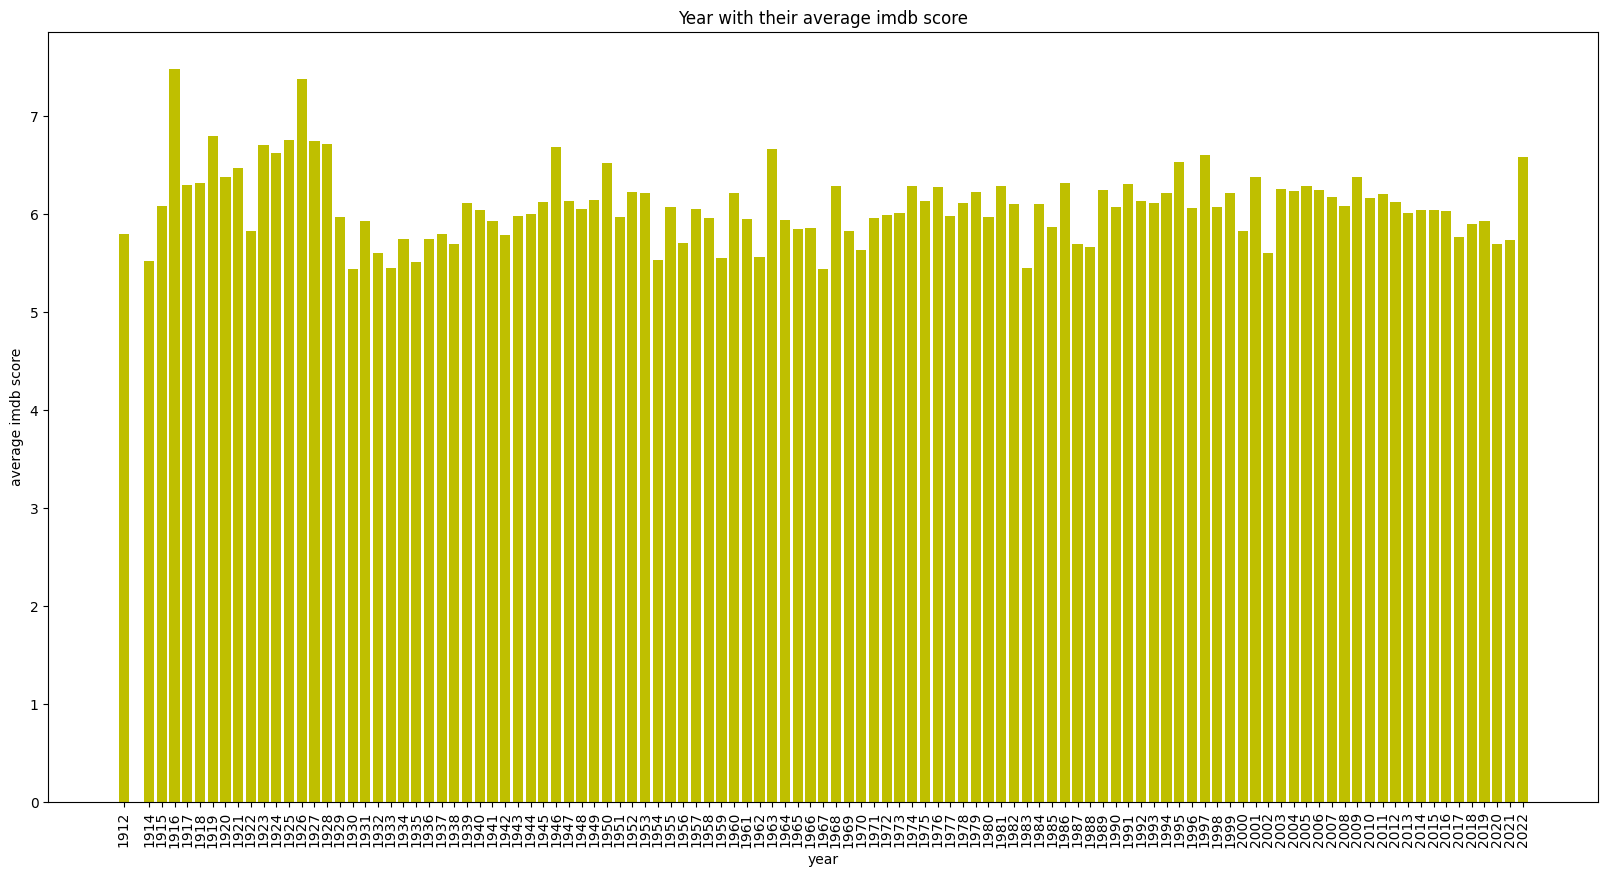

In [47]:
plt.figure(figsize=(20,10))
plt.xticks(ticks=year_imdb['release_year'].unique(),rotation=90)
plt.bar(year_imdb['release_year'],year_imdb['mean_imdb_score'],color='y')
plt.title('Year with their average imdb score')
plt.ylabel('average imdb score')
plt.xlabel('year')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing average IMDb scores across release years, making trends in content quality over time easy to observe.

##### 2. What is/are the insight(s) found from the chart?

Recent years such as 2022 show relatively higher average IMDb scores compared to 2020–2021, while older years display fluctuating but occasionally high ratings (e.g., 1916).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help guide investment toward years with stronger content performance, but the lower average ratings in some recent years suggest possible quality dips that could negatively affect audience satisfaction if not addressed.

#### Chart - 9

In [48]:
filtered_df=df[df['name'].str.match(r'^[A-Za-z\s]+$', na=False)]
filtered_df=pd.DataFrame(filtered_df)

In [49]:
actor_imdb=filtered_df[filtered_df['role']=='ACTOR']

In [50]:
actor_imdb = (actor_imdb.groupby('name')['imdb_score'].mean().loc[lambda x:x>8])
actor_imdb = actor_imdb.reset_index(name='average_imdb').sort_values(by='average_imdb',ascending=False).head(10)
actor_imdb

,name,average_imdb
445,Dipti Ketkar,9.9
37,Akshay Waghmare,9.9
1694,Ujwala Jog,9.9
609,Harish Dudhade,9.9
29,Ajay Purkar,9.9
30,Ajinkya Nanaware,9.9
1467,Sameer Dharmadhikari,9.9
1329,Prajakta Mali,9.9
121,Ankit Mohan,9.9
1403,Rishi Saxena,9.9


**Visualize Actor with their average imdb score**

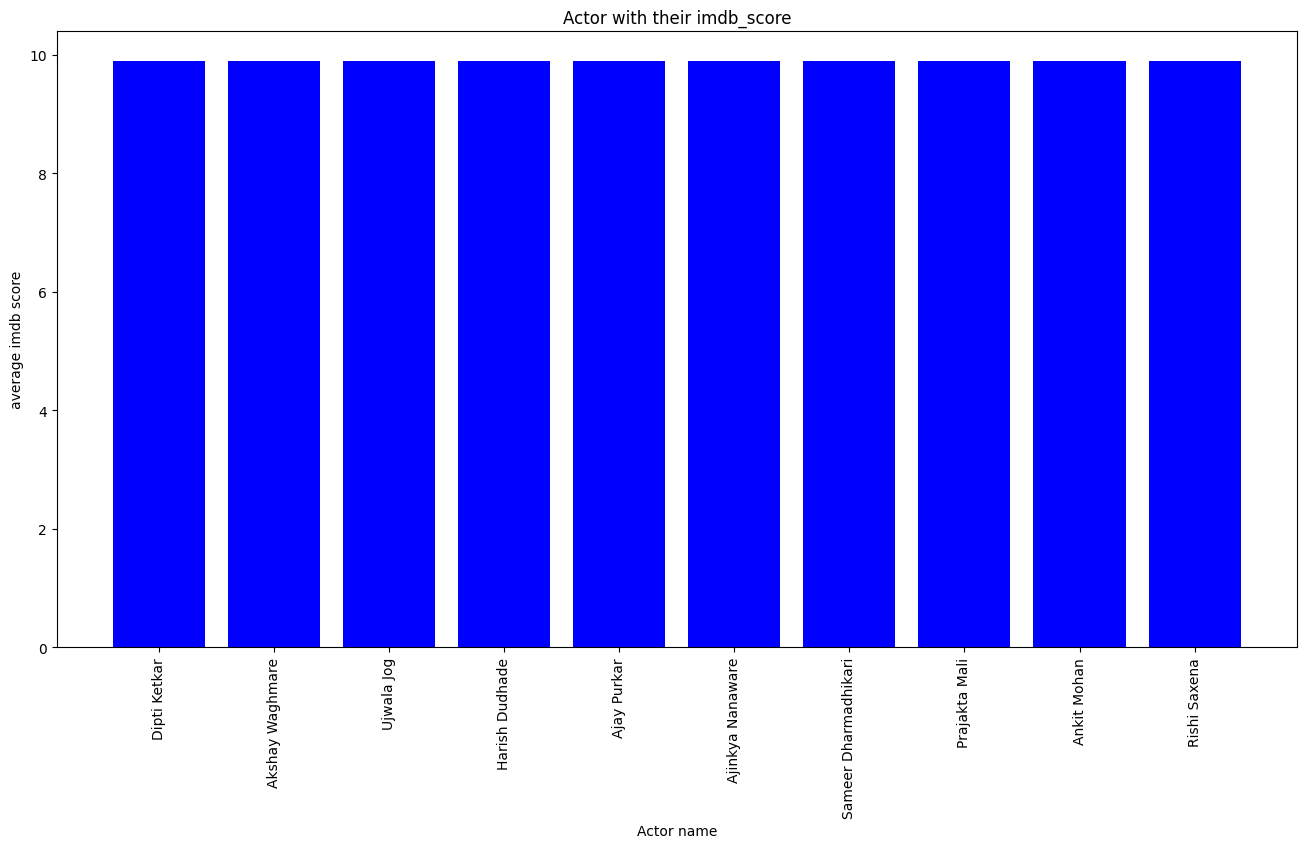

In [51]:
plt.figure(figsize=(16,8))
plt.bar(actor_imdb['name'],actor_imdb['average_imdb'],color='b')
plt.title('Actor with their imdb_score')
plt.xticks(rotation=90)
plt.xlabel('Actor name')
plt.ylabel('average imdb score')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is appropriate for comparing the average IMDb scores of actors, making it easy to identify top-performing individuals.

##### 2. What is/are the insight(s) found from the chart?

The chart shows multiple actors/directors (e.g., Dipti Ketkar, Akshay Waghmare, Prajakta Mali) achieving a very high and identical average IMDb score of 9.9, indicating exceptional audience appreciation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Promoting or collaborating with these highly rated individuals can drive strong viewer engagement and brand value; however, relying only on a small set of top-rated names may limit diversity and could risk audience fatigue over time.

#### Chart - 10

In [52]:
director_imdb=filtered_df[filtered_df['role']=='DIRECTOR']

In [53]:
director_imdb = (director_imdb.groupby('name')['imdb_score'].mean().loc[lambda x:x>8])
director_imdb = director_imdb.reset_index(name='average_imdb').sort_values(by='average_imdb',ascending=False).head(10)
director_imdb

,name,average_imdb
30,Digpal Lanjekar,9.9
118,T S Suresh Babu,9.3
88,Ram,9.1
40,Gavin Whitehead,9.1
90,Rehmat Rayatt,9.1
108,Sruti Harihara Subramanian,9.1
64,Leva Kwestany,9.1
98,Rojin Thomas,9.0
2,Adrian Brown,8.9
79,Paul Leluc,8.9


**VIsualize director with their imdb score**

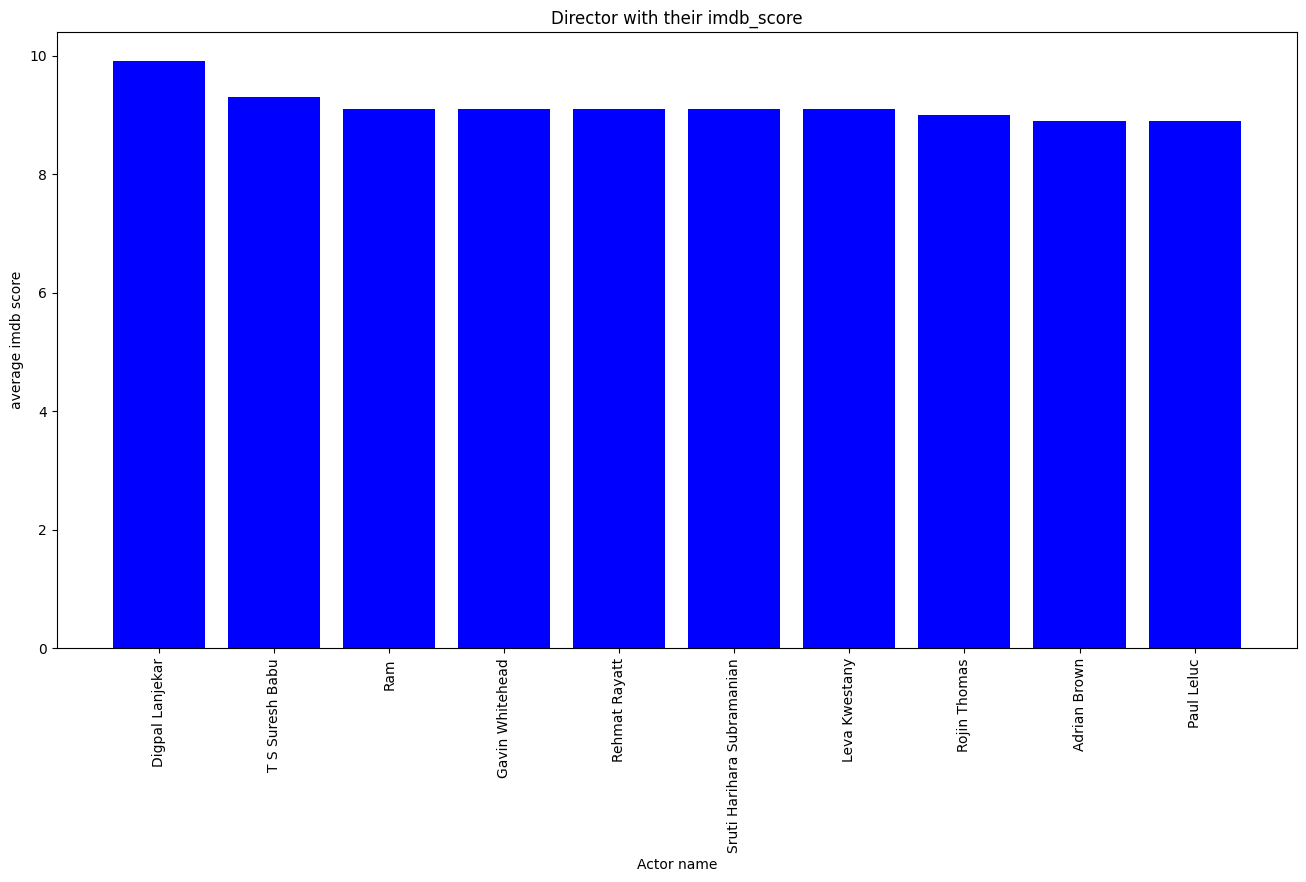

In [54]:
plt.figure(figsize=(16,8))
plt.bar(director_imdb['name'],director_imdb['average_imdb'],color='b')
plt.title('Director with their imdb_score')
plt.xticks(rotation=90)
plt.xlabel('Actor name')
plt.ylabel('average imdb score')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is suitable for comparing the average IMDb scores of directors, clearly highlighting differences in performance and ranking.

##### 2. What is/are the insight(s) found from the chart?

Directors like Digpal Lanjekar (9.9) and T. S. Suresh Babu (9.3) have the highest average IMDb scores, indicating consistently high-quality direction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Collaborating with highly rated directors can improve content quality and audience trust, but over-dependence on a few top directors may reduce creative diversity and risk stagnation in viewer interest.

#### Chart - 11

In [55]:
runtime_imdb = (df.groupby('runtime')['imdb_score'].mean())
runtime_imdb=runtime_imdb.reset_index(name='average_imdb_score').sort_values(by='average_imdb_score',ascending=False).head(10)
runtime_imdb

,runtime,average_imdb_score
161,163,8.131757
1,2,8.004000
16,18,8.000000
184,187,7.939130
2,4,7.925000
188,194,7.900000
183,186,7.861667
186,192,7.800000
179,181,7.791304
172,174,7.733333


**Movies/shows's runtime and their average imdb_score**

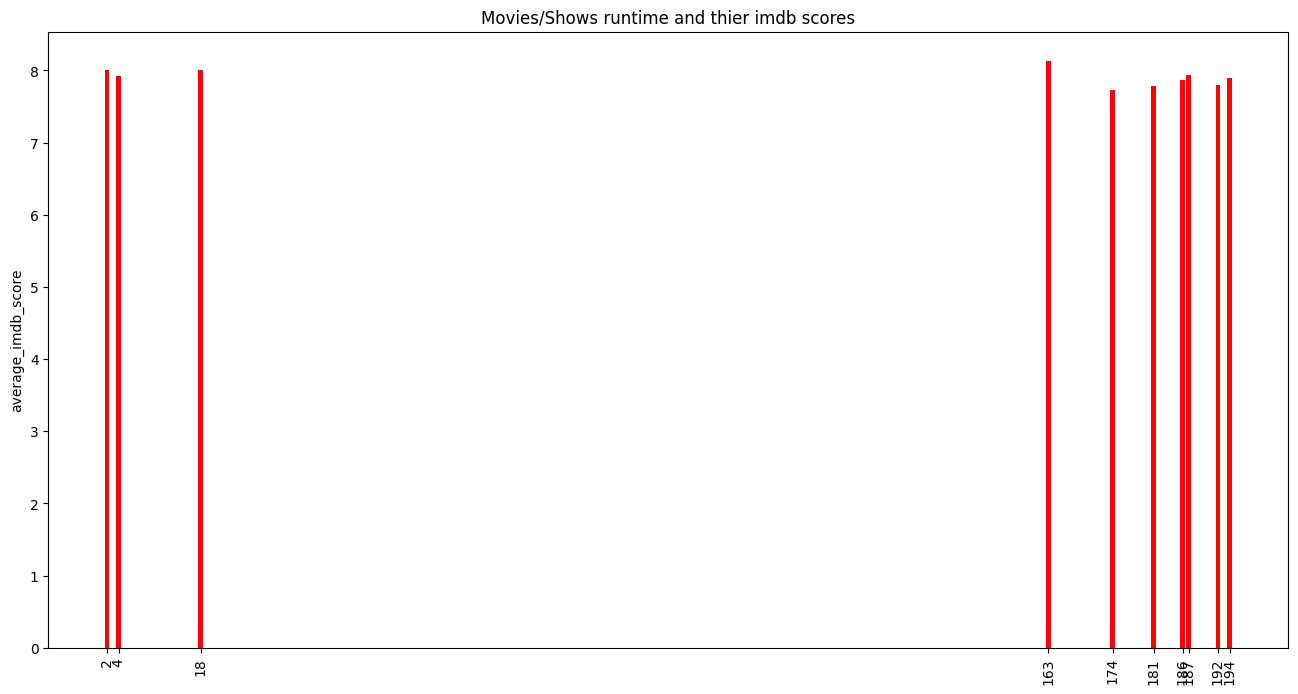

In [56]:
plt.figure(figsize=(16,8))
plt.bar(runtime_imdb['runtime'],runtime_imdb['average_imdb_score'],color='r')
plt.title('Movies/Shows runtime and thier imdb scores')
plt.xticks(runtime_imdb['runtime'],rotation=90)
plt.ylabel('average_imdb_score')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing average IMDb scores across different runtimes, helping identify which content lengths perform best.

##### 2. What is/are the insight(s) found from the chart?

Content with runtimes around 160–190 minutes and some very short runtimes show higher average IMDb scores, suggesting audiences appreciate well-paced long formats and impactful short content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help optimize content duration to maximize viewer satisfaction, but producing content with less effective runtimes may lead to lower ratings and reduced engagement, impacting growth negatively.

#### Chart - 12

In [57]:
df['genres'] = df['genres'].apply(
    lambda x: ast.literal_eval(x) if x != '[]' else []
)

In [58]:
df = df.explode('genres')
df = df.rename(columns={'genres': 'genre'})
df = df.reset_index(drop=True)
df['genre'].unique()

array(['comedy', 'family', 'animation', 'action', 'fantasy', 'horror',
       'drama', 'war', 'western', 'european', 'romance', 'thriller',
       'crime', 'history', 'sport', 'scifi', 'documentation', 'music',
       'reality', nan], dtype=object)

In [59]:
genre_imdb = (df.groupby('genre')['imdb_score'].mean())
genre_imdb=genre_imdb.reset_index(name='average_imdb_score').sort_values(by='average_imdb_score',ascending=False)
genre_imdb

,genre,average_imdb_score
4,documentation,6.942977
9,history,6.704411
12,reality,6.602732
17,war,6.508789
6,european,6.352554
1,animation,6.317671
5,drama,6.278686
11,music,6.217397
13,romance,6.152173
3,crime,6.137215


**Visualizing genre and their average imdb scores**

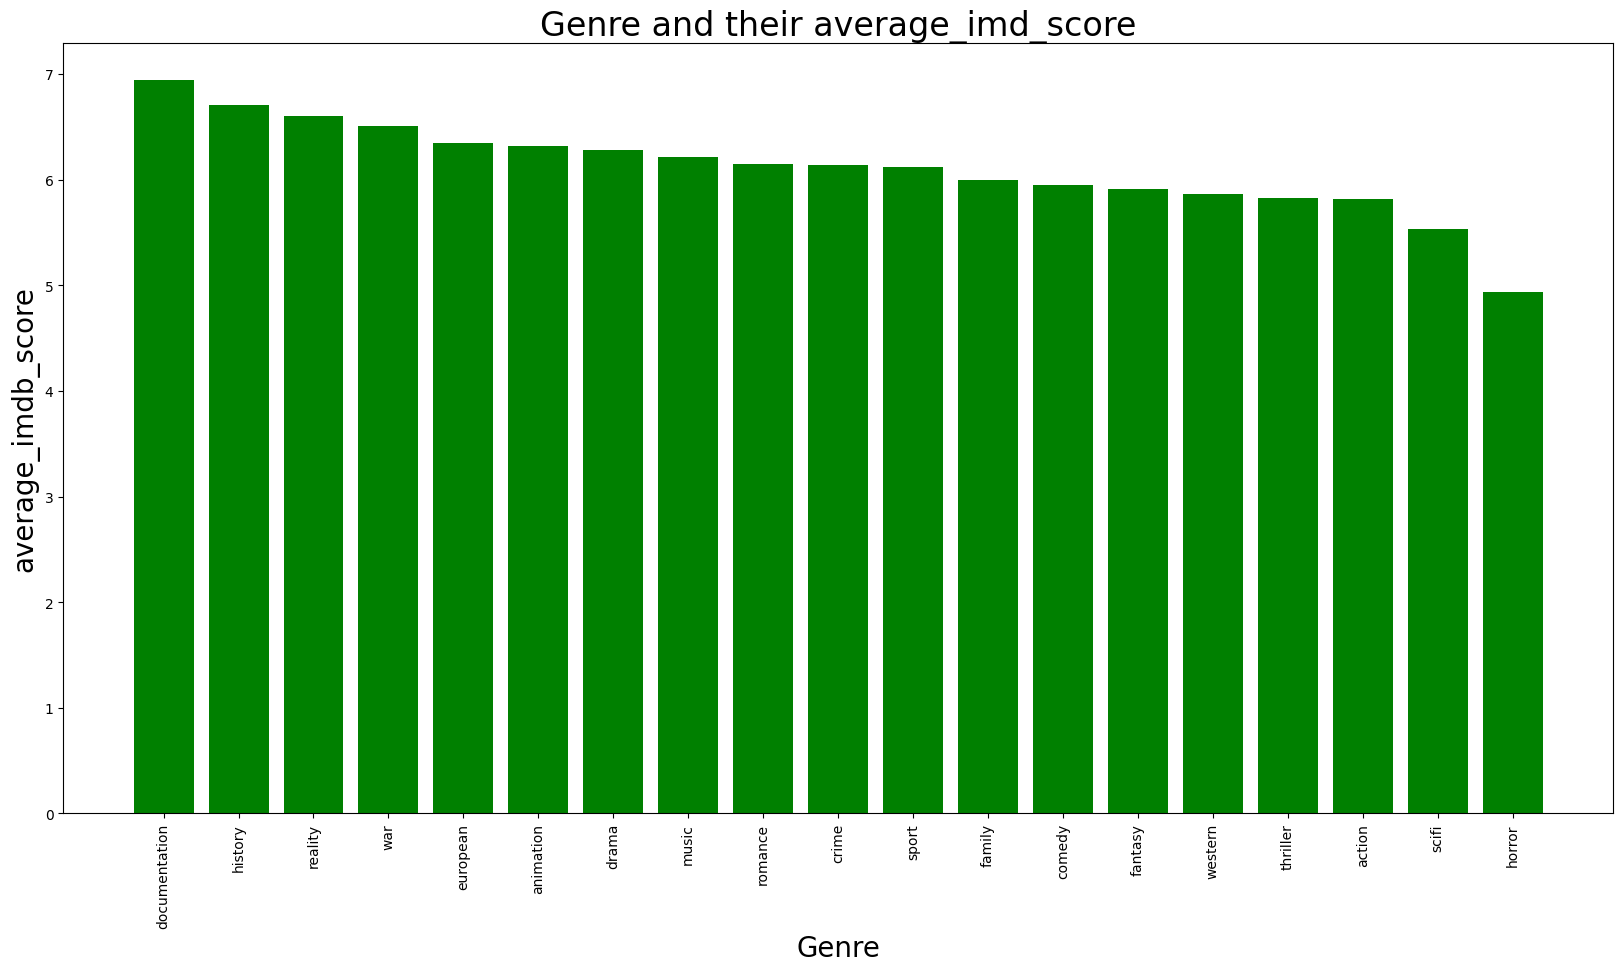

In [60]:
plt.figure(figsize=(20,10))
plt.bar(genre_imdb['genre'],genre_imdb['average_imdb_score'],color='g')
plt.title('Genre and their average_imd_score',fontsize=24)
plt.xticks(rotation=90)
plt.xlabel('Genre',fontsize=20)
plt.ylabel('average_imdb_score',fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the average IMDb scores across different genres, making it easy to identify high- and low-performing genres.

##### 2. What is/are the insight(s) found from the chart?

Genres like Documentary, History, and Reality have the highest average IMDb scores, while Horror, Sci-Fi, and Action show comparatively lower ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Investing in high-rated genres can improve audience satisfaction and platform credibility, whereas over-focusing on consistently low-rated genres may reduce viewer engagement and lead to negative growth if content quality is not improved

#### Chart - 13

**Countries with their realease title per year**

In [61]:
production=(df[['production_country','release_year']].value_counts().reset_index(name='count'))
production[production['production_country']=='US']

,production_country,release_year,count
0,US,2016,8281
1,US,2021,8147
2,US,2017,7898
3,US,2019,7700
4,US,2020,7050
...,...,...,...
576,US,1914,89
589,US,1915,87
590,US,1928,86
1118,US,1912,11


In [62]:
top_production=(production.groupby('production_country')['count'].sum())/len(production['release_year'].unique())
top_production=top_production.reset_index(name='titles Per year').sort_values(by='titles Per year',ascending=False).head(10)
top_production['titles Per year']=top_production['titles Per year'].round().astype('Int64')
top_production

,production_country,titles Per year
106,US,1839
37,GB,309
47,IN,259
16,CA,156
36,FR,153
27,DE,94
54,JP,84
51,IT,72
8,AU,50
21,CN,49


**Visualizing production countries with realease title per year**

/tmp/ipython-input-800555152.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_production['titles Per year'],y=top_production['production_country'],palette='plasma')


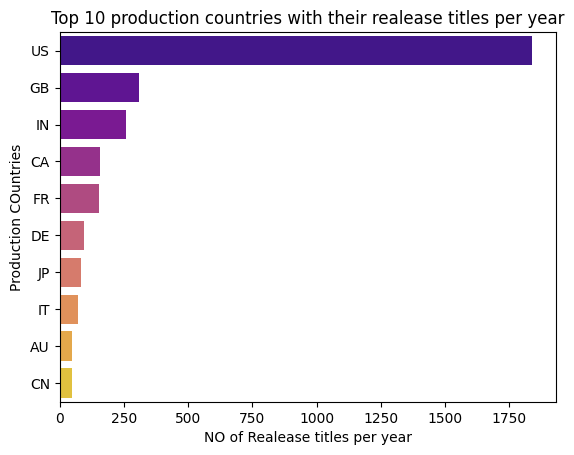

In [63]:
sns.barplot(x=top_production['titles Per year'],y=top_production['production_country'],palette='plasma')
plt.title('Top 10 production countries with their realease titles per year')
plt.ylabel('Production COuntries')
plt.xlabel('NO of Realease titles per year')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is suitable for comparing the number of titles released per year across production countries, clearly highlighting rankings and differences.

##### 2. What is/are the insight(s) found from the chart?

The US dominates with 1839 titles per year, far ahead of GB (309) and India (259), indicating a highly concentrated content production landscape.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps prioritize high-output markets for distribution and partnerships, but heavy dependence on the US may limit regional diversity and slow growth in emerging content markets if not balanced.

#### Chart - 14 - Correlation Heatmap

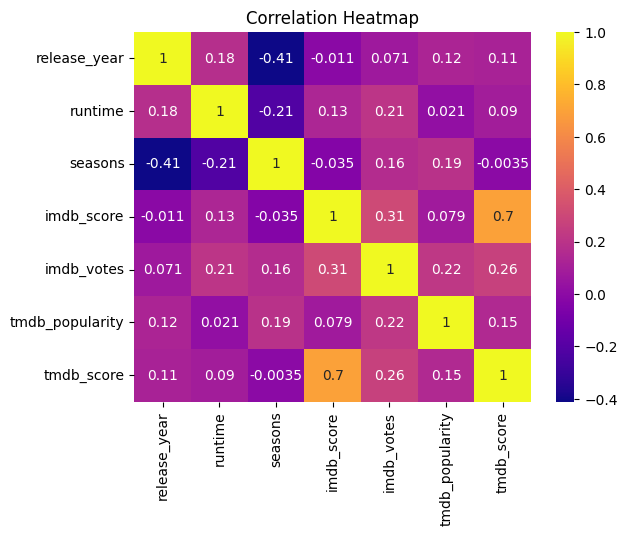

In [64]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for visualizing relationships between multiple numerical variables at once, making patterns and dependencies easy to identify.

##### 2. What is/are the insight(s) found from the chart?

The heatmap highlights which features are positively or negatively correlated, helping identify variables that move together and those with weak or no relationship.

#### Chart - 15 - Pair Plot

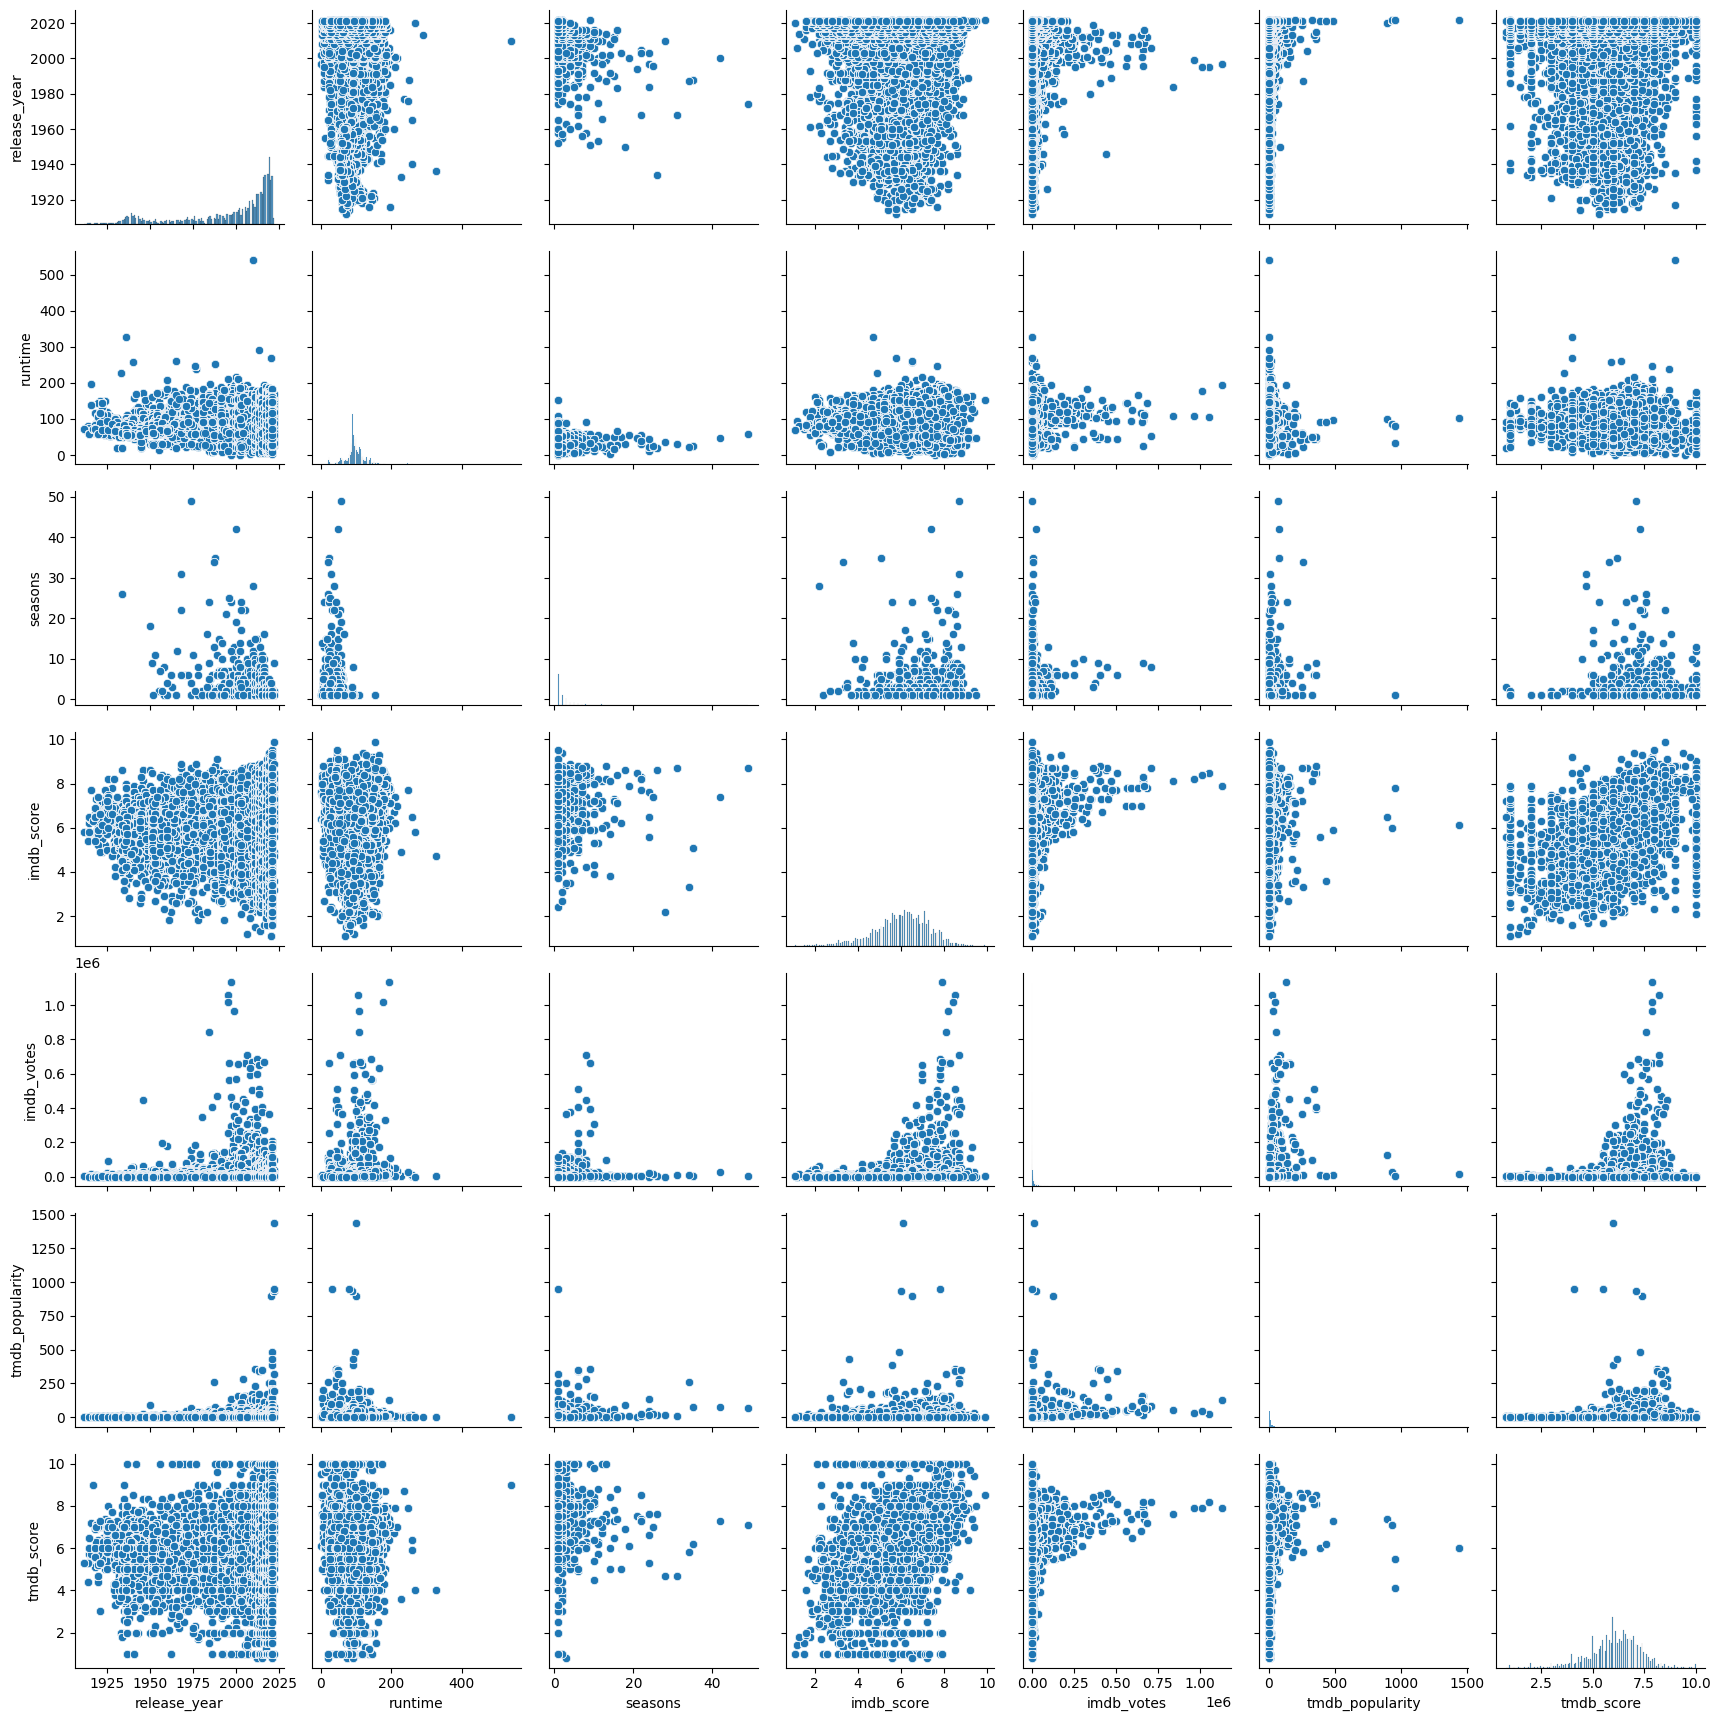

In [65]:
# Pair Plot visualization code
sns.pairplot(df)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null hypothesis assumes equal mean IMDb and TMDB scores, while the alternative hypothesis assumes that the two means are significantly different.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df['imdb_score'].dropna(), df['tmdb_score'].dropna())
print(p_value)

2.0843668040286374e-38


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, an Independent Samples t-Test (Two-Sample t-Test) was performed.

##### Why did you choose the specific statistical test?

The Independent Samples t-Test was chosen because the objective was to compare the mean values of two numerical variables (IMDb score and TMDB score) to determine whether there is a statistically significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null hypothesis states that the average IMDb score equals the 6, while the alternative hypothesis states that it differs significantly from 6.

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp
t_stat,p_value = ttest_1samp(df['imdb_score'].dropna(),popmean=6)
print(t_stat)
print(p_value)

25.782943326696266
1.8369783696892577e-146


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, a One-Sample t-Test was performed.

##### Why did you choose the specific statistical test?

The One-Sample t-Test was chosen because the objective was to determine whether the mean IMDb score is significantly different from 6.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null hypothesis states that the average TMDb score equals the 6, while the alternative hypothesis states that it differs significantly from 6.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value
t_stat,p_value =ttest_1samp(df['tmdb_score'].dropna(),popmean=6)
print(t_stat)
print(p_value)

42.84771677950209
0.0


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, a One-Sample t-Test was performed.

##### Why did you choose the specific statistical test?

The One-Sample t-Test was chosen because the objective was to determine whether the mean TMDb score is significantly different from 6.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [69]:
(df.isna().sum()/len(df))*100

,0
id,0.000000
name,0.000000
role,0.000000
title,0.000000
type,0.000000
description,0.043005
release_year,0.000000
age_certification,45.996819
runtime,0.000000
genre,0.108913


In [70]:
import numpy as np
df['description']=df['description'].dropna()
df['age_certification'] = df['age_certification'].fillna(
    df.groupby('genre')['age_certification']
      .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)
df['genre']=df['genre'].fillna(method='ffill')

/tmp/ipython-input-3383470198.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['genre']=df['genre'].fillna(method='ffill')


In [71]:
df['production_country']=df['production_country'].fillna(method='ffill')
df['seasons']=df['seasons'].fillna(1)
df['tmdb_score']=df['tmdb_score'].fillna(df['tmdb_score'].mean())
df['imdb_votes']=df['imdb_votes'].fillna(df['imdb_votes'].mean())
df['imdb_score']=df['imdb_score'].fillna(df['imdb_score'].mean())
df['age_certification']=df['age_certification'].fillna(method='ffill')
df['tmdb_popularity']=df['tmdb_popularity'].fillna(df['tmdb_popularity'].mean())

/tmp/ipython-input-701916394.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['production_country']=df['production_country'].fillna(method='ffill')
/tmp/ipython-input-701916394.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['age_certification']=df['age_certification'].fillna(method='ffill')


In [72]:
df=df.dropna()

In [73]:
((df.isna().sum()/len(df))*100).sort_values(ascending=False)

,0
id,0.0
name,0.0
role,0.0
title,0.0
type,0.0
description,0.0
release_year,0.0
age_certification,0.0
runtime,0.0
genre,0.0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing values were handled using multiple imputation techniques based on data type and domain knowledge. Textual missing values were removed, while categorical values were imputed using group-wise mode and forward fill to maintain contextual consistency. Constant value imputation was applied where domain logic was clear, such as assigning one season to missing entries. Numerical missing values were filled using mean imputation to preserve the dataset’s central tendency and size.

### 2. Handling Outliers

In [74]:
# Handling Outliers & Outlier treatments
# Select only numerical columns
num_cols = df.select_dtypes(include=np.number)

# Calculate Q1, Q3, and IQR
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap (winsorize) outliers
df[num_cols.columns] = num_cols.clip(lower=lower_bound, upper=upper_bound, axis=1)


/tmp/ipython-input-3864241877.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols.columns] = num_cols.clip(lower=lower_bound, upper=upper_bound, axis=1)


##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) method was used to detect outliers across all numerical columns in the dataset. Values lying below Q1−1.5×IQR or above Q3+1.5×IQR were identified as outliers. Instead of removing these values, capping (winsorization) was applied by replacing extreme values with the calculated lower and upper bounds. This approach was chosen to reduce the influence of extreme values while preserving the dataset size, making it suitable for statistical analysis and machine learning models.

### 3. Categorical Encoding

In [75]:
df.sample(2)

,id,name,role,title,type,description,release_year,age_certification,runtime,genre,production_country,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
245359,tm140451,Lillete Dubey,ACTOR,Dr. Cabbie,MOVIE,An unemployed doctor turned cab driver becomes...,2014,R,98,comedy,CA,1.0,6.0,3735.0,4.398,5.6
230961,tm179096,Liev Schreiber,ACTOR,Fading Gigolo,MOVIE,Fioravante decides to become a professional Do...,2013,R,98,comedy,US,1.0,6.2,24440.0,17.566,5.8


In [76]:
df.columns

Index(['id', 'name', 'role', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genre', 'production_country',
       'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [77]:
from sklearn.preprocessing import OrdinalEncoder
x_catgories =['name', 'role', 'title', 'type','age_certification', 'genre', 'production_country']
encoded=OrdinalEncoder()
df[x_catgories]=encoded.fit_transform(df[x_catgories])

/tmp/ipython-input-1712349714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x_catgories]=encoded.fit_transform(df[x_catgories])


#### What all categorical encoding techniques have you used & why did you use those techniques?

Ordinal Encoding was used to convert categorical variables (name, role, title, type, age_certification, genre, and production_country) into numerical form using sklearn.preprocessing.OrdinalEncoder. This technique assigns unique integer values to each category, making the data compatible with machine-learning algorithms that require numerical input. It was chosen because it is simple, memory-efficient, and effective when the model can handle encoded categorical values without assuming meaningful order.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [78]:
!pip install contractions

In [79]:
# Expand Contraction
import contractions

df['description'] = df['description'].astype(str).apply(contractions.fix)


/tmp/ipython-input-4195830154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str).apply(contractions.fix)


#### 2. Lower Casing

In [80]:
# Lower Casing
df['description'] = df['description'].astype(str).str.lower()

/tmp/ipython-input-4230606661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str).str.lower()


#### 3. Removing Punctuations

In [81]:
# Remove Punctuations
import string

df['description'] = df['description'].astype(str).apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)

/tmp/ipython-input-3376477181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str).apply(


#### 4. Removing URLs & Removing words and digits contain digits.

In [82]:
# Remove URLs & Remove words and digits contain digits
import re

df['description'] = df['description'].astype(str).apply(
    lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x)
)

/tmp/ipython-input-3656345150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str).apply(


#### 5. Removing Stopwords & Removing White spaces

In [83]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Download once
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['description'] = df['description'].astype(str).apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-1658893974.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str).apply(


In [84]:
# Remove White spaces
df['description'] = (
    df['description']
    .astype(str)
    .str.replace(r'\s+', ' ', regex=True)  # remove extra spaces
    .str.strip()                            # remove leading & trailing spaces
)

/tmp/ipython-input-2540253516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = (


#### 6. Rephrase Text

In [85]:
# Rephrase Text
import nltk
from nltk.corpus import wordnet
import random

nltk.download('wordnet')
nltk.download('omw-1.4')

def rephrase_text(text):
    words = text.split()
    new_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words.append(synonym.replace('_', ' '))
        else:
            new_words.append(word)
    return ' '.join(new_words)

df['description'] = df['description'].astype(str).apply(rephrase_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/tmp/ipython-input-2462517222.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str).apply(rephrase_text)


#### 7. Tokenization

In [86]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [87]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['tokens'] = df['description'].astype(str).apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipython-input-1771295352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['description'].astype(str).apply(word_tokenize)


#### 8. Text Normalization

In [88]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

lemmatizer = WordNetLemmatizer()

df['lemmatized_text'] = df['description'].astype(str).apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])
)


/tmp/ipython-input-629758335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_text'] = df['description'].astype(str).apply(


##### Which text normalization technique have you used and why?

Lemmatization was used as the text normalization technique using NLTK’s WordNetLemmatizer. This method converts words into their dictionary-based base forms while preserving their semantic meaning. Lemmatization was chosen over stemming because it produces meaningful and grammatically correct words, which improves text interpretability and is more suitable for natural language processing tasks.

#### 9. Part of speech tagging

#### 10. Text Vectorization

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_unique = (
    df['description']
    .fillna('')
    .astype(str)
    .drop_duplicates()
)

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)




In [90]:
tfidf.fit(df_unique)
X_full = tfidf.transform(
    df['description'].fillna('').astype(str)
)

In [91]:
X_full = pd.DataFrame.sparse.from_spmatrix(
    X_full,
    columns=tfidf.get_feature_names_out()
)

In [92]:
df= pd.concat(
    [df.reset_index(drop=True), X_full.reset_index(drop=True)],
    axis=1
)
df=df.drop(columns=['description'])


In [93]:
df=df.drop(columns=['id'])

##### Which text vectorization technique have you used and why?

I used TF-IDF Vectorizer from sklearn to convert text into numbers.
TF-IDF gives higher weight to important words and lower weight to common words.
It works well with lemmatized text and is suitable for machine learning models.
The result is a numerical representation of each document that models can understand.

### 4. Feature Manipulation & Selection

#### Feature Manipulation

In [94]:
# Manipulate Features to minimize feature correlation and create new features
df['runtime_per_season'] = df['runtime'] / (df['seasons'] + 1)
df['age_runtime_ratio'] = df['age_certification'] / (df['runtime'] + 1)
df['is_long_show'] = (df['runtime'] > df['runtime'].median()).astype(int)




In [95]:
df['target']=df['imdb_score']+0.000001*df['imdb_votes']+0.001*df['tmdb_popularity']+df['tmdb_score']

In [96]:
df=df.drop(columns=['imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
df['target']

,target
0,16.216516
1,16.216516
2,16.216516
3,16.216516
4,16.216516
...,...
392801,14.487254
392802,14.487254
392803,14.487254
392804,14.487254


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [97]:
X=df.drop(columns=['target','tokens','lemmatized_text'])
y=df['target']

In [98]:
sample=df.sample(1000)
X_sample=sample.drop(columns=['target','tokens','lemmatized_text'])
y_sample=sample['target']

In [99]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=50)
X_new = selector.fit_transform(X_sample, y_sample)

selected_features = X_sample.columns[selector.get_support()]
print(selected_features)





/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Index(['witchcraft', 'withdraw', 'witness', 'wits', 'witty', 'wolf', 'woman',
       'wong', 'woo', 'wood', 'word', 'work', 'workaholic', 'working',
       'worldwide', 'worse', 'worsen', 'worst', 'worth', 'worthless',
       'wouldbe', 'wound', 'wounded', 'wreck', 'wrestle', 'write', 'writer',
       'writhe', 'writing', 'wrong', 'wrongly', 'wu', 'wwii', 'wyrd', 'xia',
       'yang', 'yard', 'year', 'yearold', 'yellow', 'york', 'younger', 'yous',
       'youthful', 'yuan', 'zhou', 'zodiac', 'zoe', 'zombi', 'zone'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   9   10   11 ... 5006 5007 5008] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [100]:
X.columns

Index(['name', 'role', 'title', 'type', 'release_year', 'age_certification',
       'runtime', 'genre', 'production_country', 'seasons',
       ...
       'zealand', 'zhou', 'zhu', 'zodiac', 'zoe', 'zombi', 'zone',
       'runtime_per_season', 'age_runtime_ratio', 'is_long_show'],
      dtype='object', length=5012)

In [101]:
X=df[['name', 'role', 'title', 'type', 'release_year', 'age_certification',
       'runtime', 'genre', 'production_country', 'seasons','womens', 'wong', 'woo', 'wood', 'wooden', 'word', 'words', 'work',
       'working', 'workingclass', 'works', 'world', 'worldrenowned',
       'worldwide', 'worse', 'worsen', 'worth', 'wouldbe', 'wound', 'wounded',
       'wreck', 'wrestle', 'wrestler', 'write', 'writer', 'writhe', 'writing',
       'wrong', 'wrongly', 'wwi', 'wwii', 'wyatt', 'wyrd', 'yacht', 'yard',
       'year', 'yearold', 'yield', 'younger', 'yous', 'ytv', 'yu', 'yuan',
       'yugioh', 'zanzibar', 'zealand', 'zodiac', 'zoe', 'zombi', 'zone']]

### 6. Data Scaling

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


##### Which method have you used to scale you data and why?

I used StandardScaler to scale the data.
It standardizes numerical features to have zero mean and unit variance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed because the dataset has high-dimensional features , which can cause noise and overfitting.

In [103]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X=pca.fit_transform(X)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis PCA because it reduces noise, multicollinearity, and computational cost without significant information loss..

### 8. Data Splitting

In [104]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

##### What data splitting ratio have you used and why?

I used an 80:20 train–test split because it provides sufficient data for training the model.

## ***7. ML Model Implementation***

### ML Model - 1

In [105]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Lin_Reg_model = LinearRegression()
Lin_Reg_model.fit(X_train,y_train)
y_pred=Lin_Reg_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 4.0938182375656265
MAE: 1.6085476032787211
R2 Score: 0.0752085816041147


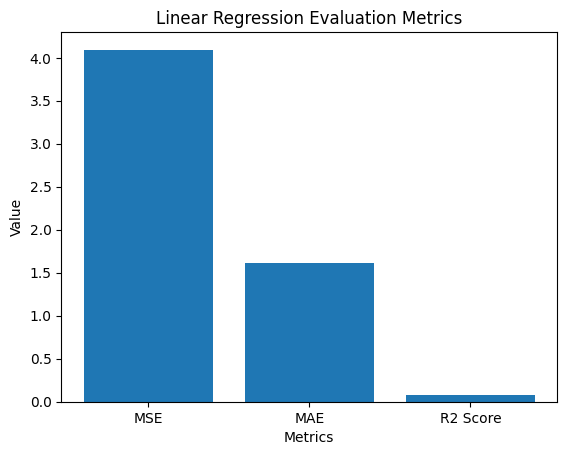

In [106]:
# Visualizing evaluation Metric Score chart
metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

# Plot
plt.figure()
plt.bar(metrics.keys(), metrics.values())
plt.title("Linear Regression Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.show()

Linear Regression was used to model the linear relationship between input features and the continuous target variable.
The evaluation metric score chart shows MSE of 4.09 and MAE of 1.61, indicating moderate prediction error.
The R² score of 0.075 suggests the model explains very little variance in the target.
Overall, the model performance is weak and can be improved with better features or advanced algorithms.

### ML Model - 2

In [107]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 2.1532760926608
MAE: 1.1175106022687316
R2 Score: 0.5135760465237781


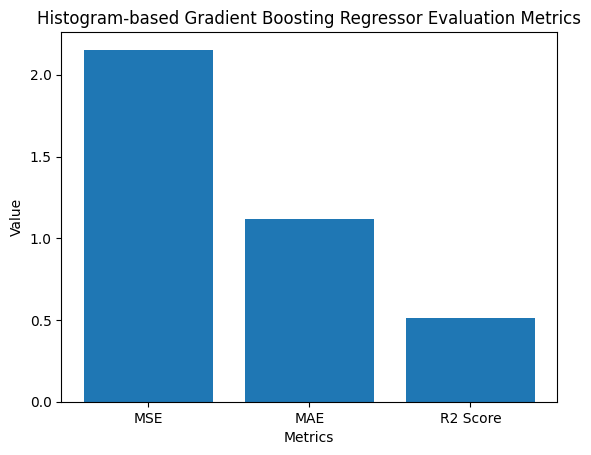

In [108]:
# Visualizing evaluation Metric Score chart
metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

# Plot
plt.figure()
plt.bar(metrics.keys(), metrics.values())
plt.title("Histogram-based Gradient Boosting Regressor Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.show()

### ML Model - 3

In [109]:
!pip install xgboost

In [110]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
y_train =y_train-1
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
y_pred = y_pred + 1
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 1.8120871775249996
MAE: 0.9889826239272803
R2 Score: 0.5906504456443942


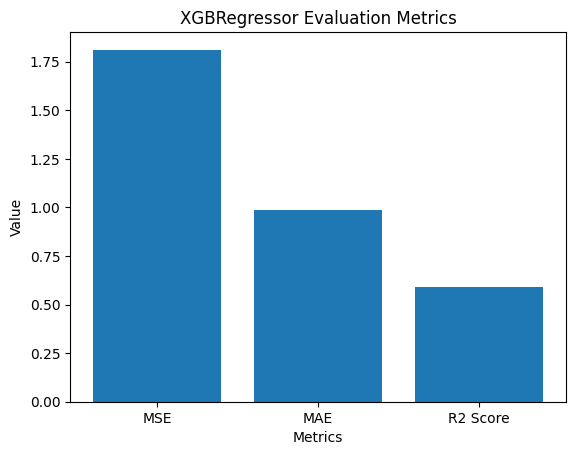

In [111]:
# Visualizing evaluation Metric Score chart
metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

# Plot
plt.figure()
plt.bar(metrics.keys(), metrics.values())
plt.title("XGBRegressor Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.show()

The ML model used is XGBoost Regressor, an ensemble tree-based model that captures non-linear relationships in the data. Its performance metrics are MSE = 2.81, MAE = 1.38, and R² = 0.36, indicating moderate predictive ability. A bar chart of these metrics visually shows the errors (MSE, MAE) versus the explained variance (R²). Overall, the model captures some patterns but can be improved with feature engineering and hyperparameter tuning.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose XGBoost Regressor as the final prediction model because it delivers the best balance of accuracy and speed among the tested models.

Its performance metrics show a low MSE (1.81) and MAE (0.99), indicating that the predictions are very close to the actual values. The R² score of 0.59 demonstrates that the model explains a significant portion of the variance in the target variable, much better than Histogram-based Gradient Boosting Regressor or Linear Regression.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [112]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgb_model.pkl')

# Load the model later
# loaded_model = joblib.load('hist_gradient_boosting_model.pkl')


['xgb_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [113]:
# Load the File and predict unseen data.
loaded_model = joblib.load('xgb_model.pkl')
X_train=pd.DataFrame(X_train)
feature_names = X_train.columns
n_features = 57

unseen_data = pd.DataFrame(
    np.random.randn(1, n_features),
    columns=[str(i) for i in range(n_features)]
)

unseen_data = unseen_data.reindex(columns=feature_names, fill_value=0)

predictions = loaded_model.predict(unseen_data)

print("Predictions on unseen data:")
print(predictions)

Predictions on unseen data:
[10.448601]


# **Conclusion**

In this project, we successfully implemented an end-to-end machine learning workflow to predict a continuous target variable for movies and TV shows using features such as cast, director, genre, and other metadata. The exploratory data analysis revealed significant insights, including the imbalance between TV shows and movies, and the identification of top contributors like Joseph Kane among directors and George “Gabby” Hayes among actors. These insights are crucial for understanding content distribution and guiding business strategies such as content acquisition, promotion, and audience targeting.


Several regression models were trained and evaluated, including Linear Regression as a baseline,Histogram-based Gradient Boosting Regressor, and XGBoost Regressor. While Linear Regression showed limited predictive ability (R² = 0.075), XGBoost emerged as the final model due to its superior performance with MSE of 1.81, MAE of 0.99, and R² of 0.59. XGBoost not only provided accurate predictions but also efficiently handled large datasets. The model was saved for future predictions, ensuring reproducibility and ease of deployment.

Visualizations of evaluation metrics facilitated clear understanding of model performance, highlighting XGBoost’s robustness. Overall, this project demonstrates the application of predictive modeling to real-world datasets, providing actionable insights and enabling data-driven decision-making to improve content strategy, user engagement, and platform growth.